#**Group Project - ETL (Extract Transform Load)**
###**Group:** 15
###**Title:** CARSOME website
###**Business Need**: Recommended Affordable Daily Cars in CARSOME
###**Group Members:**
1. Fareena binti Mohammad Firdaus (A181617)
2. Nor Syamimi binti Zainol (A181342)
3. Nurul Syafiqah binti Mohd Daud (A179965)
4. Syafiqah binti Mohamad Zaki (A181538)



#**1. Extract**

###Import Libraries

In [ ]:
#importing required libraries
import requests
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from random import randint

###Attributes

In [ ]:
#creating an empty array, so that we can append the values
#Syamimi
car_brand = []
car_title = [] #car model

#Fareena
total_price = []
car_transmission = [] #auto or manual

#Syafiqah daud
price_per_month = []
car_highlights = []

#Syafiqah zaki
car_location = []
car_mileage = []


###Data Extraction

In [ ]:
#Extract data from 11 pages
for i in range (1,11):
  url = f'https://www.carsome.my/buy-car?bodyType=1&budget=10000,50000&pageNo={i}'
  #request allow you to send HTTP request
  response = requests.get(url)
  response = response.content
  soup = BeautifulSoup(response, 'html.parser')

  #storing the required data in the variable
  car_data = soup.findAll('article', attrs= {'class': 'mod-card'})
  sleep(randint(2,8)) #load every 2 to 8 second 

  for store in car_data:
    carBrand = store.find('a', class_='mod-card__title').p.text.replace('\n','')
    car_brand.append(carBrand)

    carName = store.find('a', class_='mod-card__title').p.find_next().text.replace('\n','')
    car_title.append(carName)

    carTotalPrice = store.find('div', class_='mod-card__price__total').text.replace('\n','')
    total_price.append(carTotalPrice)

    pricePerMonth = store.find('div', class_= 'd-flex align-center justify-end price-text').span.text.replace('\n','')
    price_per_month.append(pricePerMonth)
 
    carMileage = store.find('div', class_ = 'mod-card__car-other').span.text.replace('\n', '')
    car_mileage.append(carMileage)

    carTransmission = store.find('div', class_ = 'mod-card__car-other').span.find_next('span').text.replace('\n', '')
    car_transmission.append(carTransmission)

    carLocation = store.find('div', class_ = 'mod-card__car-other').span.find_next('span').find_next('span').text.replace('\n', '')
    car_location.append(carLocation)

    carspec = store.find('div', class_ = 'mod-card__high-tag-list').findAll('span')
    if len(carspec)==3:
      carspec = store.find('div', class_ = 'mod-card__high-tag-list').span.text
      carspec2 = store.find('div', class_ = 'mod-card__high-tag-list').span.find_next('span').text
      carspec3 = store.find('div', class_ = 'mod-card__high-tag-list').span.find_next('span').find_next('span').text

      lst=[carspec, carspec2, carspec3]
      car_spec = ", ". join(lst)
    
    else:
      carspec = store.find('div', class_ = 'mod-card__high-tag-list').span.text
      carspec2 = store.find('div', class_ = 'mod-card__high-tag-list').span.find_next('span').text

      lst=[carspec, carspec2]
      car_spec = ", ". join(lst)
    
    car_highlights.append(car_spec)


In [ ]:
df = pd.DataFrame({'Car Model': car_title,
                   'Car Brand' : car_brand,
                   'Total Price' : total_price, 
                   'Price/Month' : price_per_month, 
                   'Mileage' : car_mileage,
                   'Transmission' : car_transmission,
                   'Location' : car_location,
                   'Highlights' : car_highlights
                    })

In [ ]:
#total number of data(row)
len(df)

108

In [ ]:
df.head(len(df))

,Car Model,Car Brand,Total Price,Price/Month,Mileage,Transmission,Location,Highlights
0,Almera E 1.5,2015 Nissan,"RM 40,900",RM 448/mo,"99,895 km",Automatic,Pahang,"SRS Airbag, ABS Brake, Fuel Efficiency"
1,Bezza X Premium 1.3,2016 Perodua,"RM 38,800",RM 425/mo,"100,275 km",Automatic,Pahang,"View 360, Keyless Push Start, SRS Airbag"
2,Elantra EX Plus 1.6,2015 Hyundai,"RM 43,100",RM 472/mo,"117,616 km",Automatic,Selangor,"View 360, Leather Seat, Android Player"
3,City S+ i-VTEC 1.5,2015 Honda,"RM 48,900",RM 536/mo,"95,044 km",Automatic,Melaka,"Alarm System, SRS Airbag, ABS Brake"
4,Bezza X Premium 1.3,2016 Perodua,"RM 37,400",RM 410/mo,"111,466 km",Automatic,Pahang,"View 360, Keyless Push Start, ABS Brake"
...,...,...,...,...,...,...,...,...
103,Jetta TSI 1.4,2015 Volkswagen,"RM 46,900",RM 514/mo,"131,785 km",Automatic,Selangor,"Alarm System, SRS Airbag, ABS Brake"
104,Saga Standard 1.3,2020 Proton,"RM 34,800",RM 381/mo,"12,226 km",Automatic,Pulau Pinang,"View 360, ABS Brake, SRS Airbag"
105,Bezza Advance Premium 1....,2017 Perodua,"RM 41,800",RM 458/mo,"77,508 km",Automatic,Pahang,"View 360, Keyless Push Start, Touchscreen Audi..."
106,Saga Premium 1.3,2020 Proton,"RM 37,500",RM 411/mo,"26,475 km",Automatic,Negeri Sembilan,"View 360, Touchscreen Audio Display, Reverse C..."


#**2. Transform**

###**a. Data Processing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car Model     108 non-null    object
 1   Car Brand     108 non-null    object
 2   Total Price   108 non-null    object
 3   Price/Month   108 non-null    object
 4   Mileage       108 non-null    object
 5   Transmission  108 non-null    object
 6   Location      108 non-null    object
 7   Highlights    108 non-null    object
dtypes: object(8)
memory usage: 6.9+ KB


###1. Car Model

- Remove numeric value
- Remove unnecessary symbol

Before Cleaning

In [ ]:
df['Car Model'].head()

0                   Almera        E        1.5      
1            Bezza        X Premium        1.3      
2            Elantra        EX Plus        1.6      
3             City        S+ i-VTEC        1.5      
4            Bezza        X Premium        1.3      
Name: Car Model, dtype: object

Cleaning

In [ ]:
df['Car Model']=df['Car Model'].astype(str)

In [ ]:
#Removing numeric values in 'Car Model'
df['Car Model']=df['Car Model'].replace('\d+', '', regex=True)

In [ ]:
#Removing unnecessary symbols in 'Car Model'
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~"]
for char in spec_chars:
   df['Car Model']=df['Car Model'].str.replace(char, ' ', regex=True)

After Cleaning

In [ ]:
df['Car Model'].head()

0                   Almera        E               
1            Bezza        X Premium               
2            Elantra        EX Plus               
3             City        S  i-VTEC               
4            Bezza        X Premium               
Name: Car Model, dtype: object

###2. Car Brand

- Remove numeric values

Before Cleaning

In [ ]:
df['Car Brand'].head()

0             2015        Nissan      
1            2016        Perodua      
2            2015        Hyundai      
3              2015        Honda      
4            2016        Perodua      
Name: Car Brand, dtype: object

In [ ]:
#Removing numeric values in 'Car Brand'
df['Car Brand']=df['Car Brand'].replace('\d+', '', regex=True)

After Cleaning

In [ ]:
df['Car Brand'].head()

0                     Nissan      
1                    Perodua      
2                    Hyundai      
3                      Honda      
4                    Perodua      
Name: Car Brand, dtype: object

###3. Total Price

- Remove RM and comma
- Rename column
- Change datatype to float 

Before Cleaning

In [ ]:
df['Total Price'].head()

0              RM          40,900
1              RM          38,800
2              RM          43,100
3              RM          48,900
4              RM          37,400
Name: Total Price, dtype: object

In [ ]:
#Remove RM 
df['Total Price'] = df['Total Price'].str.replace(r'RM', '', regex=True)

#Rename Column 
df.columns = df.columns.str.replace('Total Price', 'Total Price(RM)')

#Remove comma and Change datatype from object to float
df['Total Price(RM)'] = df['Total Price(RM)'].str.replace(",","").astype(float)

After Cleaning

In [ ]:
df['Total Price(RM)'].head()

0    40900.0
1    38800.0
2    43100.0
3    48900.0
4    37400.0
Name: Total Price(RM), dtype: float64

###4. Price Per Month

- Remove RM and unnecessary symbol
- Rename column
- Change data type to float

Before Cleaning

In [ ]:
df['Price/Month'].head()

0              RM 448/mo        
1              RM 425/mo        
2              RM 472/mo        
3              RM 536/mo        
4              RM 410/mo        
Name: Price/Month, dtype: object

In [ ]:
df['Price/Month']=df['Price/Month'].replace('/mo', '', regex=True)

In [ ]:
#Remove RM 
df['Price/Month'] = df['Price/Month'].str.replace(r'RM', '', regex=True)

#Rename Column 
df.columns = df.columns.str.replace('Price/Month', 'Price/Month(RM)')

#Remove comma and Change datatype from object to float
df['Price/Month(RM)'] = df['Price/Month(RM)'].str.replace(",","").astype(float)

After Cleaning

In [ ]:
df['Price/Month(RM)'].head()

0    448.0
1    425.0
2    472.0
3    536.0
4    410.0
Name: Price/Month(RM), dtype: float64

###5. Mileage
- Remove 'km' 
- Rename column

Before Cleaning

In [ ]:
df['Mileage'].head()

0     99,895 km
1    100,275 km
2    117,616 km
3     95,044 km
4    111,466 km
Name: Mileage, dtype: object

In [ ]:
#Remove km 
df['Mileage'] = df['Mileage'].str.replace(r'km', '', regex=True)

#Rename Column 
df.columns = df.columns.str.replace('Mileage', 'Mileage (km)')

After Cleaning

In [ ]:
df['Mileage (km)'].head()

0     99,895 
1    100,275 
2    117,616 
3     95,044 
4    111,466 
Name: Mileage (km), dtype: object

###6. Transmission Type

- Change to lower case
- Replace column name

Before Cleaning

In [ ]:
df['Transmission'].head()

0    Automatic
1    Automatic
2    Automatic
3    Automatic
4    Automatic
Name: Transmission, dtype: object

In [ ]:
#Convert transmission value to lower case
df['Transmission'] = df['Transmission'].str.lower()

#Rename Column 
df.columns = df.columns.str.replace('Transmission', 'Transmission Type')

After Cleaning

In [ ]:
df['Transmission Type'].head()

0    automatic
1    automatic
2    automatic
3    automatic
4    automatic
Name: Transmission Type, dtype: object

###7. Location
- Change to lower case

Before Cleaning

In [ ]:
df['Location'].head()

0      Pahang
1      Pahang
2    Selangor
3      Melaka
4      Pahang
Name: Location, dtype: object

After Cleaning

In [ ]:
df['Location'] = df['Location'].str.lower()
df['Location'].head()

0      pahang
1      pahang
2    selangor
3      melaka
4      pahang
Name: Location, dtype: object

###8. Car Highlights

- Add degree symbol for View 360 highlight

Before Cleaning

In [ ]:
df['Highlights'].head()

0      SRS Airbag, ABS Brake, Fuel Efficiency
1    View 360, Keyless Push Start, SRS Airbag
2      View 360, Leather Seat, Android Player
3         Alarm System, SRS Airbag, ABS Brake
4     View 360, Keyless Push Start, ABS Brake
Name: Highlights, dtype: object

In [ ]:
df['Highlights'] = df['Highlights'].str.replace(r'View 360', 'View 360°', regex=True)

After Cleaning

In [ ]:
df['Highlights'].head()

0       SRS Airbag, ABS Brake, Fuel Efficiency
1    View 360°, Keyless Push Start, SRS Airbag
2      View 360°, Leather Seat, Android Player
3          Alarm System, SRS Airbag, ABS Brake
4     View 360°, Keyless Push Start, ABS Brake
Name: Highlights, dtype: object

Check if there is any missing value

In [ ]:
df.isnull().sum()

Car Model            0
Car Brand            0
Total Price(RM)      0
Price/Month(RM)      0
Mileage (km)         0
Transmission Type    0
Location             0
Highlights           0
dtype: int64

##**b. Data visualization**

1. Import libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Price Per Month**

Text(0.5, 1.0, 'Distribution Price Per Month')

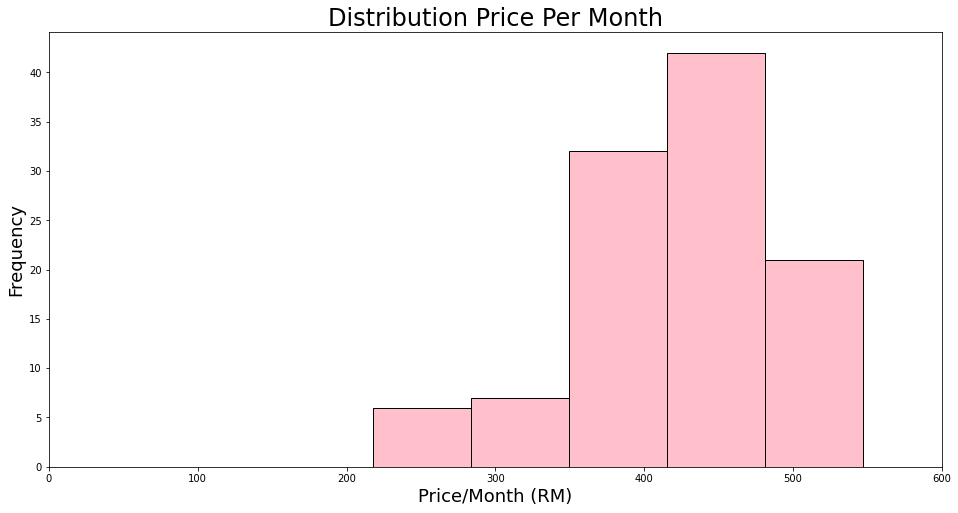

In [ ]:
df['Price/Month(RM)'].plot(kind='hist', color='pink', edgecolor='black', bins=5, figsize=(16,8))

plt.xlim(xmin=0, xmax = 600)

plt.xlabel('Price/Month (RM)', fontsize=18)

plt.ylabel('Frequency', fontsize=18)

plt.title('Distribution Price Per Month', fontdict={'fontsize': 24})

**Total Price**

Text(0.5, 1.0, 'Distribution of Car Total Price')

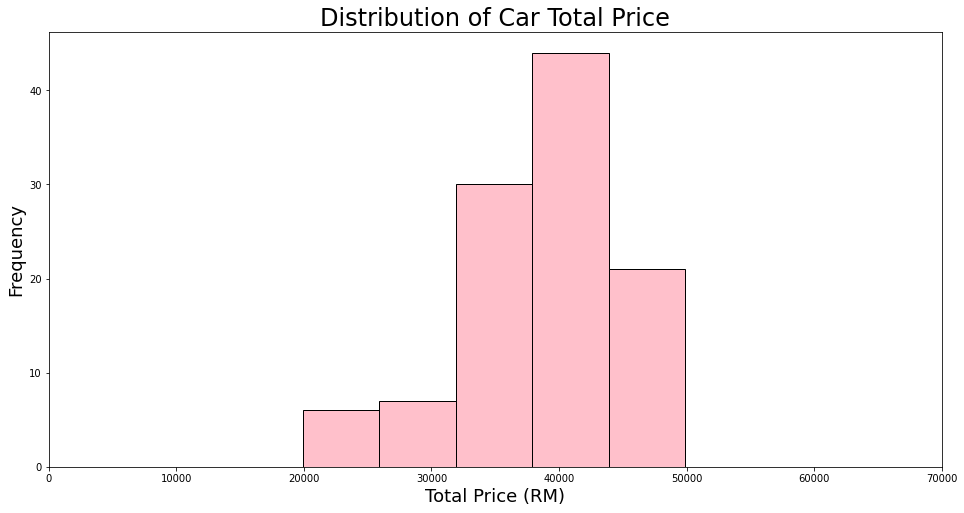

In [ ]:
df['Total Price(RM)'].plot(kind='hist', color='pink', edgecolor='black', bins=5, figsize=(16,8))
plt.xlim(xmin=0, xmax = 70000)
plt.xlabel('Total Price (RM)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Distribution of Car Total Price', fontdict={'fontsize': 24})

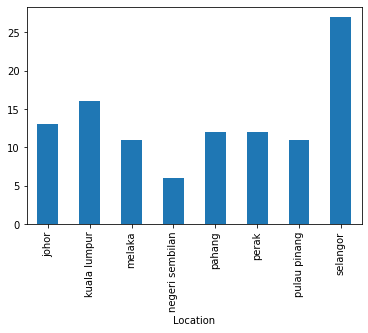

In [ ]:
df.groupby('Location').size().plot.bar()

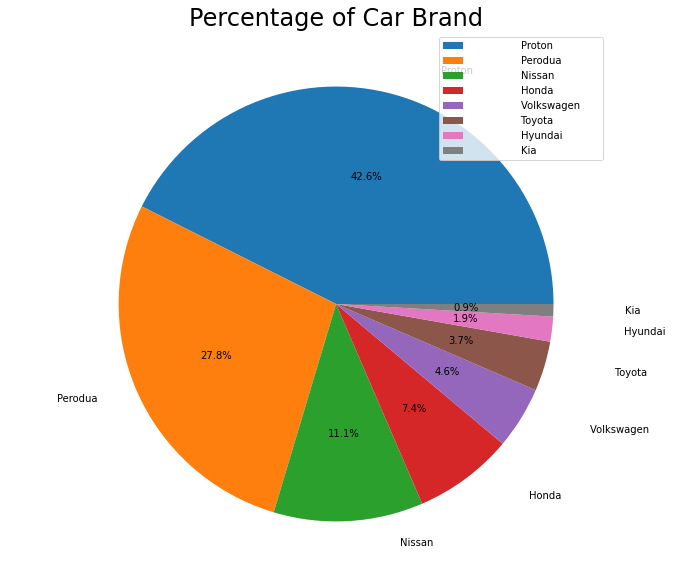

In [127]:
df['Car Brand'].value_counts().plot(kind='pie', label='', legend=True, autopct='%1.1f%%', figsize=(14,10))
plt.title("Percentage of Car Brand", fontdict={'fontsize': 24})
plt.show()

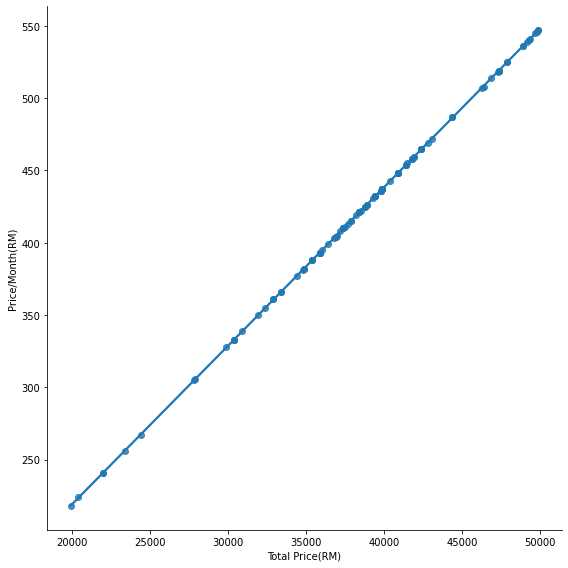

In [ ]:
sns.lmplot(x='Total Price(RM)',y='Price/Month(RM)',data=df,fit_reg=True, height=8)

#**3. Load**

All data after cleaning

In [122]:
df.head(len(df))

,Car Model,Car Brand,Total Price(RM),Price/Month(RM),Mileage (km),Transmission Type,Location,Highlights
0,Almera E,Nissan,40900.0,448.0,"99,895",automatic,pahang,"SRS Airbag, ABS Brake, Fuel Efficiency"
1,Bezza X Premium,Perodua,38800.0,425.0,"100,275",automatic,pahang,"View 360°, Keyless Push Start, SRS Airbag"
2,Elantra EX Plus,Hyundai,43100.0,472.0,"117,616",automatic,selangor,"View 360°, Leather Seat, Android Player"
3,City S i-VTEC,Honda,48900.0,536.0,"95,044",automatic,melaka,"Alarm System, SRS Airbag, ABS Brake"
4,Bezza X Premium,Perodua,37400.0,410.0,"111,466",automatic,pahang,"View 360°, Keyless Push Start, ABS Brake"
...,...,...,...,...,...,...,...,...
103,Jetta TSI,Volkswagen,46900.0,514.0,"131,785",automatic,selangor,"Alarm System, SRS Airbag, ABS Brake"
104,Saga Standard,Proton,34800.0,381.0,"12,226",automatic,pulau pinang,"View 360°, ABS Brake, SRS Airbag"
105,Bezza Advance Premium ...,Perodua,41800.0,458.0,"77,508",automatic,pahang,"View 360°, Keyless Push Start, Touchscreen Aud..."
106,Saga Premium,Proton,37500.0,411.0,"26,475",automatic,negeri sembilan,"View 360°, Touchscreen Audio Display, Reverse ..."


Save dataframes into csv file

In [121]:
df.to_csv('carsome_cleaned_data.csv')